<p style='text-align:center; font-size: 36px; color:#0B0B23; font-weight: bold;'>Page View Time Series Visualizar</p>

For this project i will visualize time series data using a line chart, bar chart, and box plots. I will use Pandas, Matplotlib, and Seaborn to visualize a dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03. The data visualizations will help to understand the patterns in visits and identify yearly and monthly growth.

First things first, let's import all libs

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

Now we can import the data, since we are working with dates we also have to parse it

In [3]:
df = pd.read_csv('data/fcc-forum-pageviews.csv')
df

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933
...,...,...
1299,2019-11-29,171584
1300,2019-11-30,141161
1301,2019-12-01,142918
1302,2019-12-02,220144


In [4]:
df.dtypes

date     object
value     int64
dtype: object

In [5]:
df.date = pd.to_datetime(df.date)

In [6]:
df.dtypes

date     datetime64[ns]
value             int64
dtype: object

In [7]:
df.set_index('date', inplace=True)
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


To make the plots more precise, i'm going to filter out the top 2.5% and the bottom 2.5% 

In [8]:
df = df[
  (df['value'] >= df['value'].quantile(0.025)) &
  (df['value'] <= df['value'].quantile(0.975))
]
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


### Now we can plot a simple line chart

Text(0, 0.5, 'Page Views')

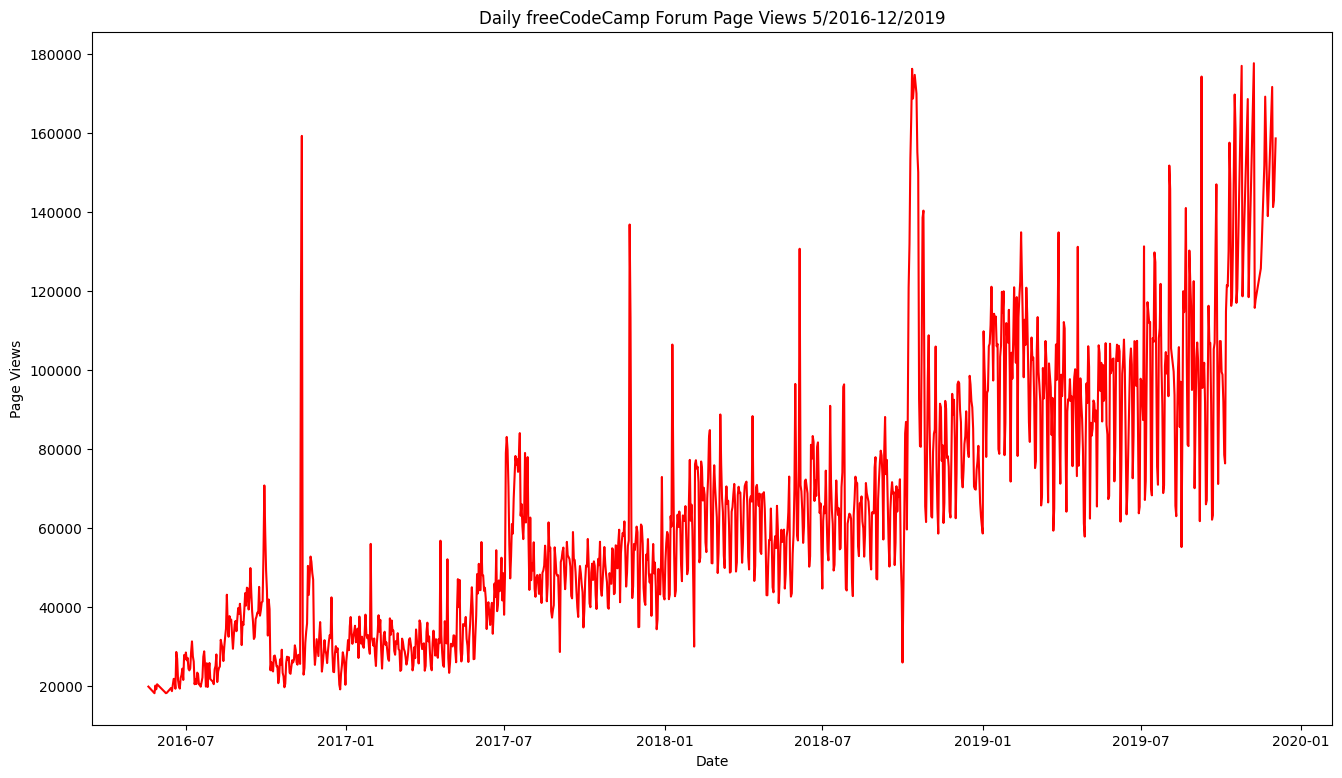

In [18]:
plt.figure(figsize=(16,9))
plt.plot(df.index, df["value"], 'r')
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.xlabel('Date')
plt.ylabel('Page Views')

We can the the average number growing as years passes and some outliers

### Let's see more cleary and detailed with a bar chart

Let's also specify the months and years in the data

In [9]:
df_b = df.copy()
df_b["month"] = df_b.index.month
df_b["year"] = df_b.index.year
df_b

,value,month,year
date,,,
2016-05-19,19736,5,2016
2016-05-26,18060,5,2016
2016-05-27,19997,5,2016
2016-05-28,19044,5,2016
2016-05-29,20325,5,2016
...,...,...,...
2019-11-24,138875,11,2019
2019-11-29,171584,11,2019
2019-11-30,141161,11,2019


And prepare it for plotting

In [13]:
df_bar = df_b.groupby(["year", "month"])["value"].mean()
df_bar = df_bar.unstack()
df_bar

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


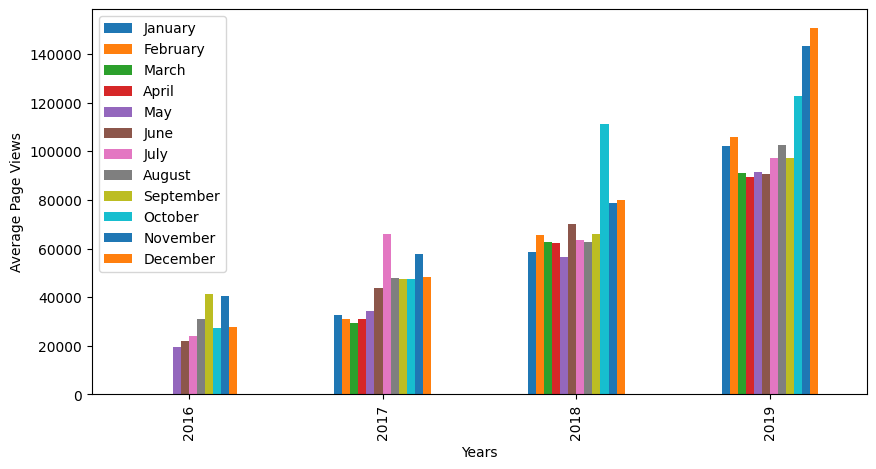

In [14]:
df_bar.plot.bar(legend=True, figsize = (10,5), ylabel="Average Page Views", xlabel="Years").figure
plt.legend(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

We can see it that the page views grows by each year and there's some month outliers in there, which probably results from some marketing campaigns

### Last but not least, let's create a box plot

Again i'm going to show the year and month in the data

In [20]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
df_box

,date,value,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May
...,...,...,...,...
1233,2019-11-24,138875,2019,Nov
1234,2019-11-29,171584,2019,Nov
1235,2019-11-30,141161,2019,Nov
1236,2019-12-01,142918,2019,Dec


And then plot it. In this case i'm going to do 2 box plots in one image

Text(0, 0.5, 'Page Views')

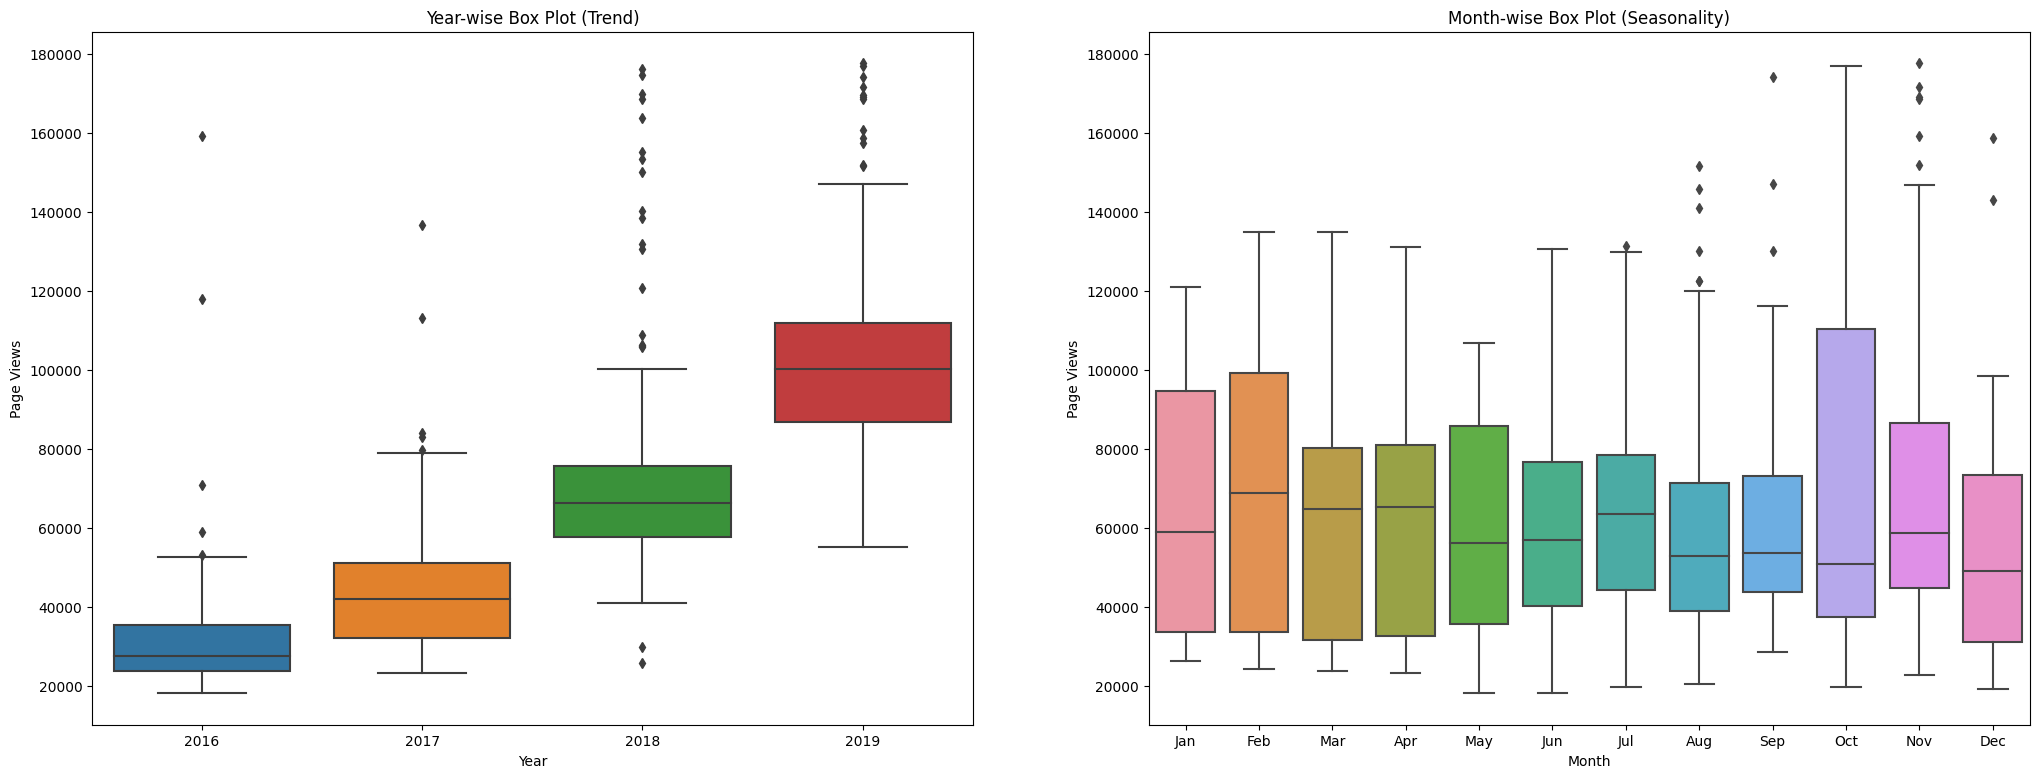

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(25,9))

df_box["month_num"] = df_box["date"].dt.month
df_box = df_box.sort_values("month_num")

axes[0].set_title('Year-wise Box Plot (Trend)')
box_one = sns.boxplot(df_box, x='year', y='value', ax=axes[0])
box_one.set_xlabel('Year')
box_one.set_ylabel('Page Views')
  
axes[1].set_title('Month-wise Box Plot (Seasonality)')
box_two = sns.boxplot(df_box, x='month', y='value', ax=axes[1])
box_two.set_xlabel('Month')
box_two.set_ylabel('Page Views')

These box plots are even more detailed, showing the average page views by years and months, and also show the outliers